In [1]:
# This reads in a contrast curve and converts the contrast to masses

# Created 2020 Feb. 13 by E.S.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Transform
from matplotlib.ticker import (
    AutoLocator, AutoMinorLocator, FuncFormatter)
from scipy import interpolate

%matplotlib qt

In [2]:
# define some basic functions

def asec_to_AU(input_asec):

    # convert asec to AU
    dist_altair = 5.130 # pc
    output_AU = np.multiply(dist_altair,input_asec)
    
    return output_AU


def AU_to_asec(input_AU):

    # convert AU to asec
    dist_altair = 5.130 # pc
    output_asec = np.divide(input_AU,dist_altair)
    
    return output_asec

In [3]:
# absolute magnitude of host star in NB205 filter

## ## PLACEHOLDER VALUE HERE; CURRENT VALUE FROM NOTEBOOK
## ## determine_abs_mag_altair.ipynb; NOT DOUBLE-CHECKED; 
## ## REPLACE LATER (NOTE ALSO THAT ALTAIR IS A VARIABLE SOURCE!)

abs_mag_altair_nb405 = 1.87

In [3]:
# Obtain input data

# pipeline will output a fake companion amplitude which is normalized, linearly, to the host star (amplitude of 1)

# make/read in a contrast curve, where contrast is defined as the flux ratio F_planet/F_star where detection
# has 5-sigma significance
## contrast_df = pd.read_csv("data/fake_contrast_curve.csv")
contrast_df = pd.read_csv("data/classical_curve_20200316.csv")

In [4]:
# convert linear empirical contrast to del_mag
contrast_df["del_mag_LMIR"] = -2.5*np.log10(contrast_df["contrast_lim"])

# convert del_mag (between planet and host star) to abs. mag (of planet)
contrast_df["abs_mag_LMIR"] = np.add(contrast_df["del_mag_LMIR"],abs_mag_altair_nb405)

# convert asec to AU
dist_altair = 5.130 # pc
contrast_df["AU"] = np.multiply(dist_altair,contrast_df["asec"])

NameError: name 'abs_mag_altair_nb405' is not defined

In [5]:
# read in models

# these are from
# AMES-Cond: https://phoenix.ens-lyon.fr/Grids/AMES-Cond/ISOCHRONES/model.AMES-Cond-2000.M-0.0.NaCo.Vega

# Br-alpha filter is model_data["NB4.05"], in Vega magnitudes

model_data = pd.read_csv("data/1gr_data.txt", delim_whitespace=True)

In [6]:
# read in NACO transmission curve for comparison

naco_trans = pd.read_csv("data/Paranal_NACO.NB405.dat.txt", names = ["angstrom", "transm"], delim_whitespace=True)
lmir_bralpha_trans = pd.read_csv("data/br-alpha_NDC.txt", delim_whitespace=True)
lmir_bralpha_trans["Wavelength_angstr"] = np.multiply(10000.,lmir_bralpha_trans["Wavelength"])

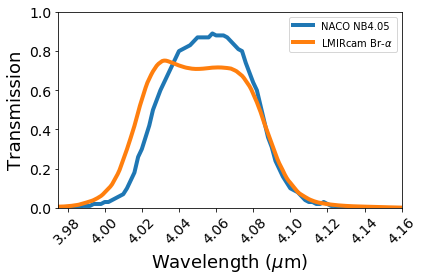

In [32]:
# plot filter curves

plt.clf()
plt.plot(np.divide(naco_trans["angstrom"],1e4), naco_trans["transm"], label = "NACO NB4.05", linewidth=4)
plt.plot(np.divide(lmir_bralpha_trans["Wavelength_angstr"],1e4), lmir_bralpha_trans["Trans_77"], 
         label = "LMIRcam Br-"+r"$\alpha$", linewidth=4)
plt.xlim([3.9750,4.1550])
plt.ylim([0,1])
plt.xlabel("Wavelength ("+r"$\mu$m"+")", fontsize=18)
plt.ylabel("Transmission", fontsize=18)
#locs, labels = xticks()
plt.xticks(np.arange(3.98, 4.16, step=0.02), rotation=45, fontsize=14)
plt.yticks(np.arange(0, 1.1, step=0.2), fontsize=14)
plt.legend()
plt.tight_layout()
plt.savefig("filter_comparizon_v2.pdf")
#plt.show()

In [17]:
model_data

,M/Ms,Teff(K),L/Ls,lg(g),R(Gcm,D,Li,J,H,Ks,...,IB2.33,IB2.36,IB2.39,IB2.42,IB2.45,IB2.48,1p6,1p57,1p625_q3,1p625_q4
0,0.0005,111.0,-8.85,3.12,7.13,1.0000,1.0000,37.946,32.828,53.077,...,63.818,66.254,62.135,55.153,50.325,48.276,33.670,32.806,35.892,35.843
1,0.0010,160.0,-8.19,3.39,7.39,1.0000,1.0000,31.299,29.035,44.538,...,53.181,56.081,54.242,48.166,44.377,42.060,29.294,28.575,31.418,31.369
2,0.0020,226.0,-7.56,3.66,7.60,1.0000,1.0000,25.315,25.017,35.698,...,41.787,45.287,45.404,40.829,37.787,35.768,24.669,24.092,26.755,26.705
3,0.0030,270.0,-7.24,3.83,7.69,1.0000,1.0000,23.488,23.519,32.195,...,37.575,40.875,40.913,38.135,34.704,32.816,22.796,22.420,24.792,24.741
4,0.0040,304.0,-7.03,3.95,7.72,1.0000,1.0000,21.978,22.402,29.484,...,34.331,37.469,37.495,35.911,32.331,30.518,21.423,21.163,23.347,23.297
5,0.0050,342.0,-6.83,4.05,7.68,1.0000,1.0000,21.293,21.556,27.638,...,32.013,34.753,34.792,33.668,30.376,28.870,20.498,20.285,22.378,22.328
6,0.0060,377.0,-6.66,4.13,7.65,1.0000,1.0000,20.626,20.733,25.869,...,29.827,32.247,32.286,31.652,28.568,27.313,19.593,19.423,21.427,21.379
7,0.0070,403.0,-6.56,4.21,7.59,1.0000,1.0000,20.142,20.158,24.601,...,28.292,30.532,30.559,30.288,27.312,26.186,18.972,18.824,20.777,20.730
8,0.0080,438.0,-6.42,4.27,7.53,1.0000,1.0000,19.725,19.679,23.392,...,26.896,28.963,29.005,28.880,26.172,25.113,18.446,18.334,20.211,20.166
9,0.0090,464.0,-6.33,4.33,7.47,1.0000,1.0000,19.428,19.329,22.514,...,25.870,27.787,27.840,27.834,25.333,24.329,18.062,17.973,19.800,19.756


### Interpolate the models to map absolute mag to mass

In [8]:
# make function to interpolate models

f_abs_mag_2_mass = interpolate.interp1d(model_data["NB4.05"],model_data["M/Ms"])

# ... and its inverse

f_mass_2_abs_mag = interpolate.interp1d(model_data["M/Ms"],model_data["NB4.05"])

In [57]:
# plot model data and interpolation

plt.clf()
plt.plot(model_data["NB4.05"], model_data["M/Ms"], color="blue", label="model points", marker="o")
plt.scatter(contrast_df["abs_mag_LMIR"], contrast_df["masses_LMIR"], color="orange", 
            label="contrast curve interpolation")
plt.xlabel("abs_mag LMIR")
plt.ylabel("M/M_solar")
plt.legend()
plt.show()

In [13]:
# return masses (M/M_solar) corresponding to our contrast curve

contrast_df["masses_LMIR"] = f_abs_mag_2_mass(contrast_df["del_mag_widthFWHM"])


# return more masses corresponding to interpolations at intervals

mass_intervals = [0.5,0.6,0.7,0.8,0.9,1.0]
annotate_mass_intervals = ["0.5 Ms","0.6 Ms","0.7 Ms","0.8 Ms","1.0 Ms","1.0 Ms"]
abs_mag_intervals = f_mass_2_abs_mag(mass_intervals)

/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:688: RuntimeWarning: invalid value encountered in less
  below_bounds = x_new < self.x[0]
/Users/nyumbani/anaconda3/envs/py366/lib/python3.6/site-packages/scipy/interpolate/interpolate.py:689: RuntimeWarning: invalid value encountered in greater
  above_bounds = x_new > self.x[-1]


### Make plot

#### left y-axis: abs mag
#### bottom x-axis: asec
#### right y-axis: M/Ms
#### top x-axis: AU

In [17]:
#f = lambda q: q
#finv = lambda x: np.log10(2+x)+np.cos(x)

fig, ax = plt.subplots()
fig.suptitle("Contrast curve\n(based on M_altair = 1.8; NOT QUADRUPLE-CHECKED")
ax2 = ax.twinx()
ax.set_xlim([0,2.2]) # 0 to 2.2 asec
ax.get_shared_y_axes().join(ax,ax2)

ax.set_ylabel('Abs mag (LMIR)')
ax.set_xlabel('Angle (asec)')

ax.plot(contrast_df["asec"], contrast_df["abs_mag_LMIR"])

# secondary x axis on top
secax_x = ax.secondary_xaxis('top', functions=(asec_to_AU, AU_to_asec))
secax_x.set_xlabel('Distance (AU)')

# draw horizontal lines corresponding to certain masses
for t in range(0,len(mass_intervals)):
    ax.axhline(y=abs_mag_intervals[t], linestyle="--", color="k")
    ax.annotate(annotate_mass_intervals[t],
                xy=(0.4,abs_mag_intervals[t]), 
                xytext=(0,0), textcoords="offset points")

ax2.yaxis.set_major_formatter(FuncFormatter(lambda t,pos: f"{f_abs_mag_2_mass(t):.2f}"))
ax2.set_ylabel('Masses (M/Ms)')
plt.gca().invert_yaxis()
plt.show()

In [11]:
contrast_df.keys()

Index(['Unnamed: 0', 'del_mag_widthFWHM', 'radius_pix', 'asec', 'contrast_lim',
       'del_mag_LMIR', 'abs_mag_LMIR', 'AU', 'masses_LMIR'],
      dtype='object')

In [ ]:
# sources of error:
# 1. uncertainty of distance from parallax
# 2. wavelength dependency of atmospheric transmission -> absolute magnitude of planet
# 3. small differences in filter bandpass between LMIR, NB4.05